# Reading in Some Data

In [ ]:
# Preprocessing data:
# code at: 
# https://github.com/koaning/calm-notebooks/blob/master/scikit-prep/scikit-prepare.ipynb
# video at: https://www.youtube.com/watch?v=0B5eIE_1vpU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv("drawndata1.csv")

In [4]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [5]:
X = df[['x', 'y']].values
y = df['z'] == "a"

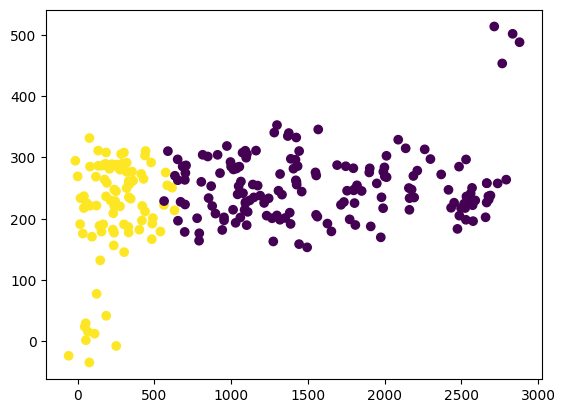

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Just applying a scaler here.

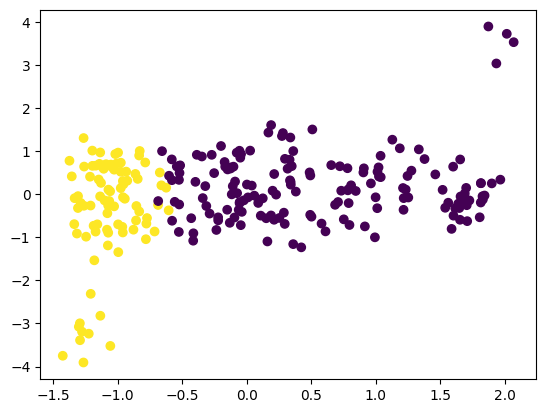

In [7]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

(array([ 32., 146., 175., 127., 118.,  79.,  75.,  51.,  47.,  41.,  20.,
         22.,  14.,  12.,   7.,   9.,   4.,   5.,   5.,   0.,   3.,   1.,
          3.,   2.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-1.30340318, -1.05723091, -0.81105864, -0.56488637, -0.3187141 ,
        -0.07254183,  0.17363045,  0.41980272,  0.66597499,  0.91214726,
         1.15831953,  1.4044918 ,  1.65066407,  1.89683635,  2.14300862,
         2.38918089,  2.63535316,  2.88152543,  3.1276977 ,  3.37386997,
         3.62004225,  3.86621452,  4.11238679,  4.35855906,  4.60473133,
         4.8509036 ,  5.09707587,  5.34324815,  5.58942042,  5.83559269,
         6.08176496]),
 <BarContainer object of 30 artists>)

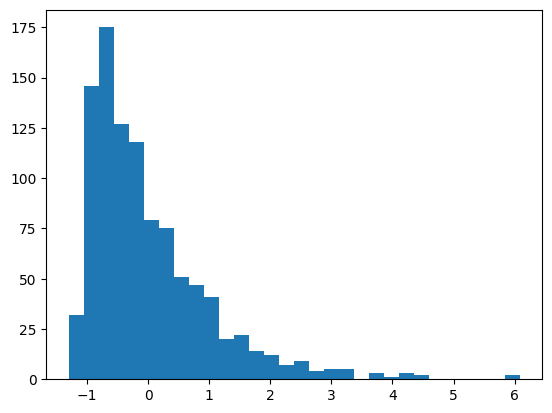

In [13]:
# Let's demonstrate the weakness of the StandardScaler: Outliers:

x = np.random.exponential(10,(1000)) + np.random.normal(0,1,(1000))

plt.hist((x - np.mean(x))/np.std(x), 30)

# We still have outliers!!:
# It is better to use Quantile preprocessing Scaler (next cell)

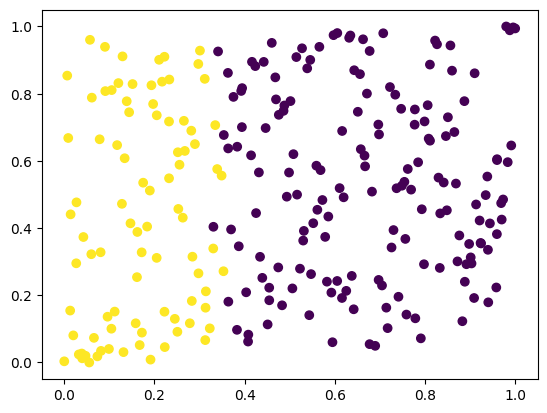

In [15]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

Function to deal with the plotting.

In [16]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Effect of StandardScaler

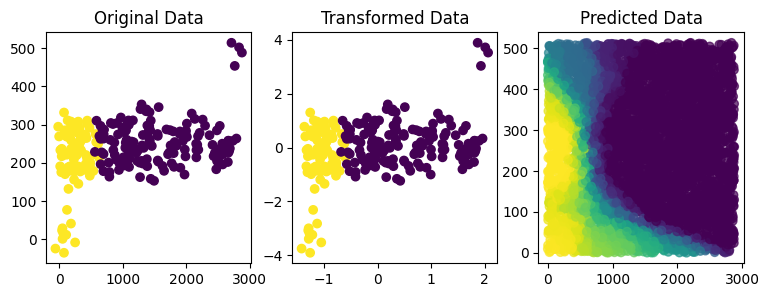

In [17]:
plot_output(scaler=StandardScaler())

Effect of QuantileTransformer

In [19]:
# QuantileTransformer is much less impacted by outliers !!!

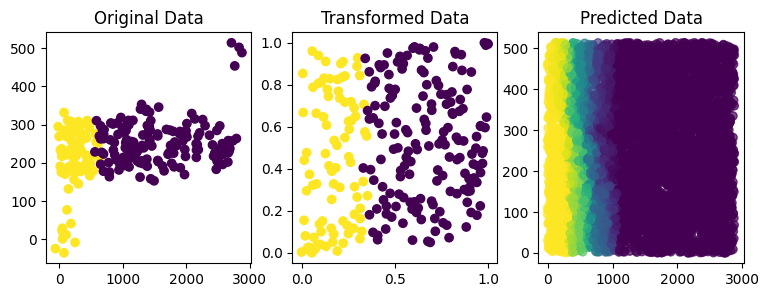

In [18]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

# New Dataset

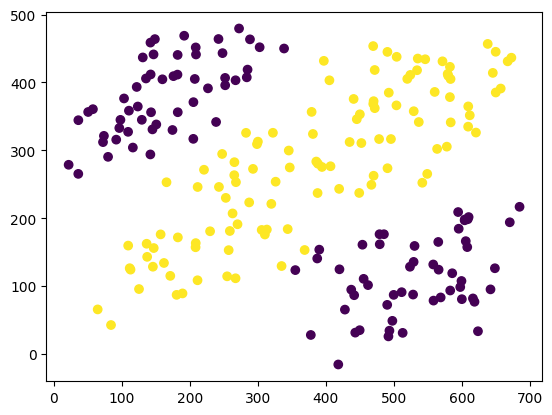

In [20]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

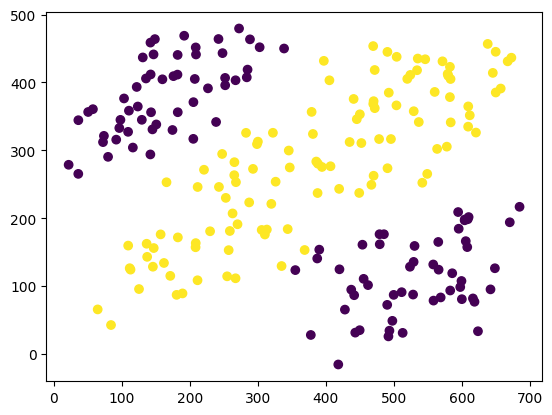

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures  # !!!
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),   # QuantileTransformer would not work here
    ("model", LogisticRegression())    # but PonlynomialFeatures results in good output
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

# One Hot Encoding

In [22]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [30]:
enc.transform([["zero"]])

array([[0., 0., 0.]])